In [2]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('crx.data',header = None)

In [7]:
#A1 A2 A3... A16
varnames = ['A' + str(s) for s in range(1,17)]

In [9]:
data.columns = varnames

In [11]:
data.head(20) #peeking data till 20 rows

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [12]:
#replace '?' with nan
data = data.replace('?',np.nan)

In [13]:
#retrieve info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    object 
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [14]:
#recast some variables to their correct types
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

In [15]:
#Encode A16 vals from + and -
data['A16'] = data['A16'].map({'+':1,'-':0})

In [16]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [17]:
#Categorical variables
  #Nominals(Names): R,G,B,Ooty
  #Ordinals(Ordering): Monday-Sunday

In [22]:
#find categorical variables
cat_columns = [c for c in data.columns if data[c].dtypes == 'O']

In [23]:
data[cat_columns].head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g
2,a,u,g,q,h,t,f,f,g
3,b,u,g,w,v,t,t,t,g
4,b,u,g,w,v,t,f,f,s


In [24]:
numerical = [i for i in data.columns if i not in cat_columns]

In [25]:
numerical

['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16']

In [26]:
data = pd.read_csv('loan.csv')

In [27]:
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


**Continuous Variables**

In [28]:
data['disbursed_amount'].unique()

array([23201.5 ,  7425.  , 11150.  , ...,  6279.  , 12894.75, 25584.  ])

In [29]:
data['interest'].unique()

array([15.484 , 11.2032,  8.51  , ..., 12.9195, 11.2332, 11.0019])

Discrete Variables

In [30]:
data['number_open_accounts'].unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

In [31]:
data['householder'].unique()

array(['RENT', 'OWNER', 'MORTGAGE'], dtype=object)

In [32]:
data['employment']

0             Teacher
1          Accountant
2        Statistician
3               Other
4          Bus driver
            ...      
9995    Civil Servant
9996    Civil Servant
9997       Accountant
9998       Bus driver
9999       Accountant
Name: employment, Length: 10000, dtype: object

In [33]:
data['employment'].unique()

array(['Teacher', 'Accountant', 'Statistician', 'Other', 'Bus driver',
       'Secretary', 'Software developer', 'Nurse', 'Taxi driver', nan,
       'Civil Servant', 'Dentist'], dtype=object)

In [34]:
data['target'].unique()

array([0, 1])

In [35]:
data['time_employed'].unique()

array(['<=5 years', '>5 years', nan], dtype=object)

In [36]:
data['householder'].value_counts()

MORTGAGE    4957
RENT        4055
OWNER        988
Name: householder, dtype: int64

In [38]:
data[['date_issued','date_last_payment']].dtypes

date_issued          object
date_last_payment    object
dtype: object

In [39]:
data['date_issued_dt'] = pd.to_datetime(data['date_issued'])

In [40]:
data['date_last_payment_dt'] = pd.to_datetime(data['date_last_payment'])

In [41]:
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued_dt,date_last_payment_dt
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013-06-11,2016-01-14
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,2014-05-08,2016-01-25
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,2013-10-26,2014-09-26
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,2015-08-20,2016-01-26
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,2014-07-22,2016-01-11


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             10000 non-null  int64         
 1   disbursed_amount        10000 non-null  float64       
 2   interest                10000 non-null  float64       
 3   market                  10000 non-null  object        
 4   employment              9389 non-null   object        
 5   time_employed           9471 non-null   object        
 6   householder             10000 non-null  object        
 7   income                  10000 non-null  float64       
 8   date_issued             10000 non-null  object        
 9   target                  10000 non-null  int64         
 10  loan_purpose            10000 non-null  object        
 11  number_open_accounts    10000 non-null  float64       
 12  date_last_payment       10000 non-null  object 

In [44]:
#Extract Month from the date
data['month']= data['date_issued_dt'].dt.month

In [45]:
data.head()

,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12,date_issued_dt,date_last_payment_dt,month
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN,2013-06-11,2016-01-14,6
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN,2014-05-08,2016-01-25,5
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN,2013-10-26,2014-09-26,10
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN,2015-08-20,2016-01-26,8
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN,2014-07-22,2016-01-11,7


In [46]:
data['year']= data['date_issued_dt'].dt.year

In [ ]:
data.head()

In [48]:
data['date']= data['date_issued_dt'].dt.date

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   customer_id             10000 non-null  int64         
 1   disbursed_amount        10000 non-null  float64       
 2   interest                10000 non-null  float64       
 3   market                  10000 non-null  object        
 4   employment              9389 non-null   object        
 5   time_employed           9471 non-null   object        
 6   householder             10000 non-null  object        
 7   income                  10000 non-null  float64       
 8   date_issued             10000 non-null  object        
 9   target                  10000 non-null  int64         
 10  loan_purpose            10000 non-null  object        
 11  number_open_accounts    10000 non-null  float64       
 12  date_last_payment       10000 non-null  object 

In [51]:
from matplotlib import pyplot as plt

In [61]:
dev_ages = [21,22,23,24,25]
dev_salary = [35,36,37,39,40]

py_salary = [38,40,45,50,55]

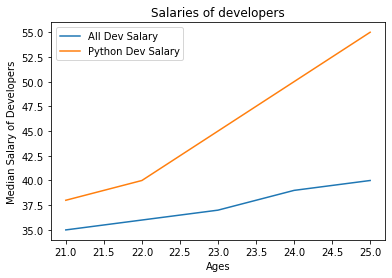

In [64]:
plt.title('Salaries of developers')
plt.xlabel('Ages')
plt.ylabel('Median Salary of Developers')
plt.plot(dev_ages,dev_salary, label = 'All Dev Salary')
plt.plot(dev_ages,py_salary, label = 'Python Dev Salary')

plt.legend()